In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv(r"C:\Code\Statistiska metoder\Datasets\Student_Performance.csv")

In [27]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [28]:
X = df[["Hours Studied", "Previous Scores"]].values
Y = df["Performance Index"]

In [29]:
X_design = np.column_stack((np.ones(len(X)), X))
X_design

array([[ 1.,  7., 99.],
       [ 1.,  4., 82.],
       [ 1.,  8., 51.],
       ...,
       [ 1.,  6., 83.],
       [ 1.,  9., 97.],
       [ 1.,  7., 74.]])

In [30]:
#Räkna ut linjära regressionen, prediktorn och residualen
beta = np.linalg.lstsq(X_design, Y, rcond=None)[0]
Y_pred = X_design.dot(beta)
residuals = Y- Y_pred

In [31]:
#Räkna ut Mellanvärdet, variance, standardavikelsen
Y_mean = np.mean(Y)
std = np.std(residuals, ddof=1)
variance = np.var(residuals, ddof=1)


In [32]:
#Räkna ut SSE, SST, SSR och R^2
SST = np.sum(Y - Y_mean)
SSE = np.sum(residuals**2)
SSR = SST / SSE
R_squared = SSR/SST

In [38]:
print(f"The linear regression looks like Y = {beta[0]} + {beta[1]}X")
print(f"Intercept: {beta[0]}")
print(f"Koefficienter: {beta[1:]}")
print(f"Varians: {variance}")
print(f"Standardavvikelse: {std}")
print(f"SST (Total Sum of Squares): {SST}")
print(f"SSE (Sum of Squared Errors): {SSE}")
print(f"SSR (Sum of Squares for Regression): {SSR}")
print(f"R^2: {R_squared}")

The linear regression looks like Y = -29.816789860385224 + 2.857637245414601X
Intercept: -29.816789860385224
Koefficienter: [2.85763725 1.01912275]
Varians: 5.2148043492246146
Standardavvikelse: 2.2835946114020795
SST (Total Sum of Squares): -2.0804691303055733e-11
SSE (Sum of Squared Errors): 52142.82868789694
SSR (Sum of Squares for Regression): -3.9899429752043324e-16
R^2: 1.917809265748779e-05


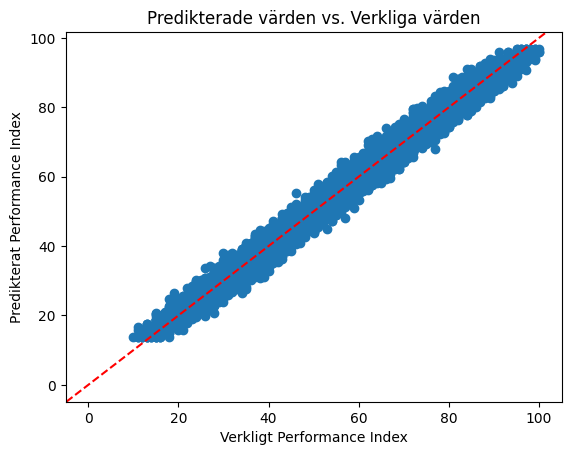

In [37]:

plt.scatter(Y, Y_pred)
plt.xlabel("Verkligt Performance Index")
plt.ylabel("Predikterat Performance Index")
plt.title("Predikterade värden vs. Verkliga värden")
plt.axline([0, 0], slope=1, color="red", linestyle="--")  # 45-graders referenslinje
plt.show()
